In [5]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [6]:
import sys
libs = [sns, np, sklearn, pd, matplotlib]
for i in libs:
    print(i.__version__)

0.11.2
1.21.6
1.0.2
1.3.5
3.5.2


In [7]:
from platform import python_version
python_version()

'3.7.12'

## Exploratory data analysis

In [8]:
dg = pd.read_csv('full.csv')
dg = dg.drop(['Source_doi'], axis=1)
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Complex       120 non-null    int64  
 1   Charge        120 non-null    int64  
 2   Shift         120 non-null    int64  
 3   Dipole        120 non-null    float64
 4   q             120 non-null    int64  
 5   Brutto        120 non-null    object 
 6   Charge_class  120 non-null    object 
 7   Geometry      120 non-null    object 
 8   Ligand        120 non-null    object 
 9   Smiles        120 non-null    object 
 10  1             120 non-null    float64
 11  2             120 non-null    float64
 12  3             120 non-null    float64
 13  4             120 non-null    float64
 14  5             120 non-null    float64
 15  6             120 non-null    float64
 16  7             120 non-null    float64
 17  8             120 non-null    float64
 18  9             120 non-null    

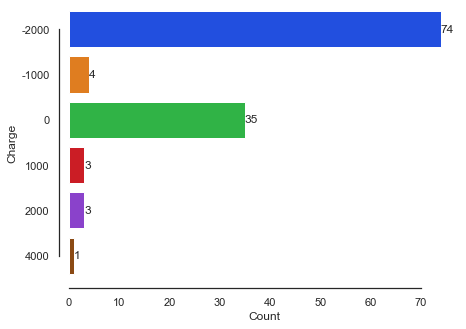

In [9]:
sns.set_style(style="white")
sns.set_context("notebook")

_, ax = plt.subplots(figsize=(7,5))
fig_ = sns.countplot(y='Charge', data=dg, palette='bright')
sns.despine(offset=10, trim=True)
ax.bar_label(ax.containers[0])
fig_.set(xlabel='Count', ylabel= 'Charge')
# plt.savefig('charge_count.png', dpi=300)
plt.show()

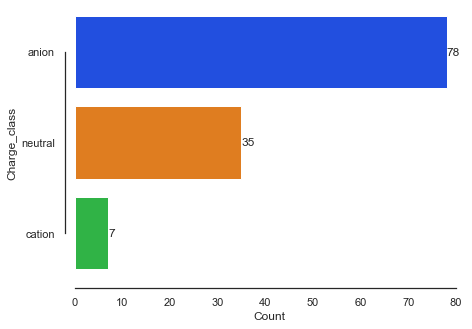

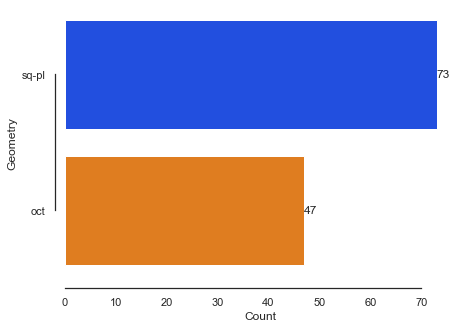

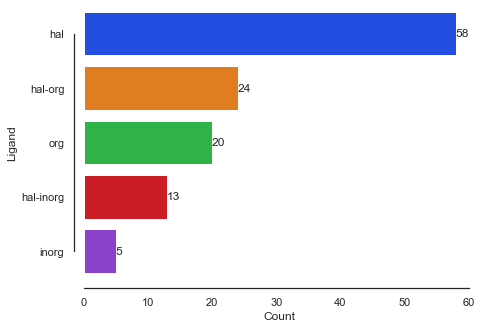

In [10]:
for column in dg.select_dtypes(include='object'):
    if dg[column].nunique() < 10:
        _, ax = plt.subplots(figsize=(7,5))
        fig_ = sns.countplot(ax=ax, y=column, data=dg, palette='bright')
        sns.despine(offset=10, trim=True)
        ax.bar_label(ax.containers[0])
        fig_.set(xlabel='Count', ylabel= column)
#         fig.savefig('{}.png'.format(column), dpi=300, bbox_inches='tight')
        plt.show()

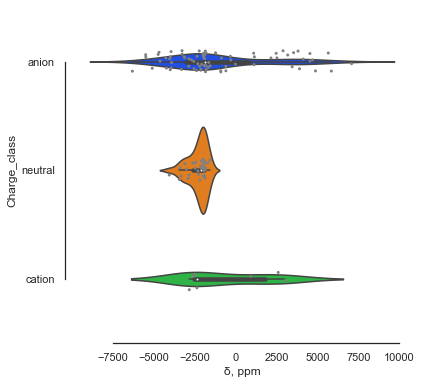

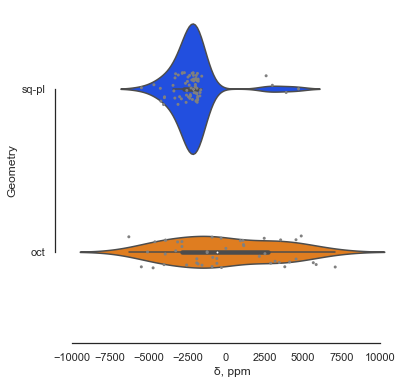

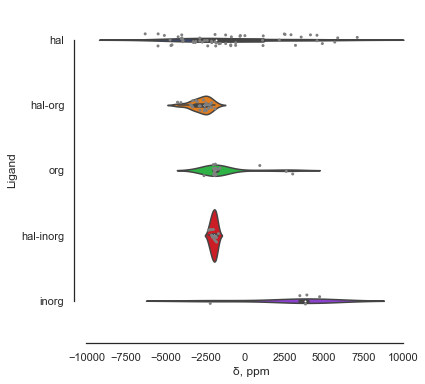

In [11]:
for column in dg.select_dtypes(include='object'):
    if dg[column].nunique() < 10:
        
        swarm_plot, ax = plt.subplots(figsize=(6,6))
        swarm_plot = sns.violinplot(y=column, x='Shift', data=dg, palette='bright')
        sns.stripplot(y=column, x='Shift', data=dg, color='gray', size=3)
        sns.despine(offset=10, trim=True)
        swarm_plot.set(xlabel='\u03B4, ppm', ylabel= column)

        plt.show()
        fig = swarm_plot.get_figure()
#         fig.savefig('{}.png'.format(column), dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Count')

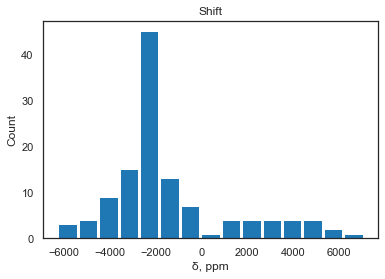

In [12]:
fig, ax = plt.subplots()
dg.hist('Shift', ax=ax, bins=15, grid=False, figsize=(7,5), zorder=2, rwidth=0.9)
plt.xlabel('\u03B4, ppm')
plt.ylabel('Count')
# plt.savefig('shift_hist.png', dpi=300)

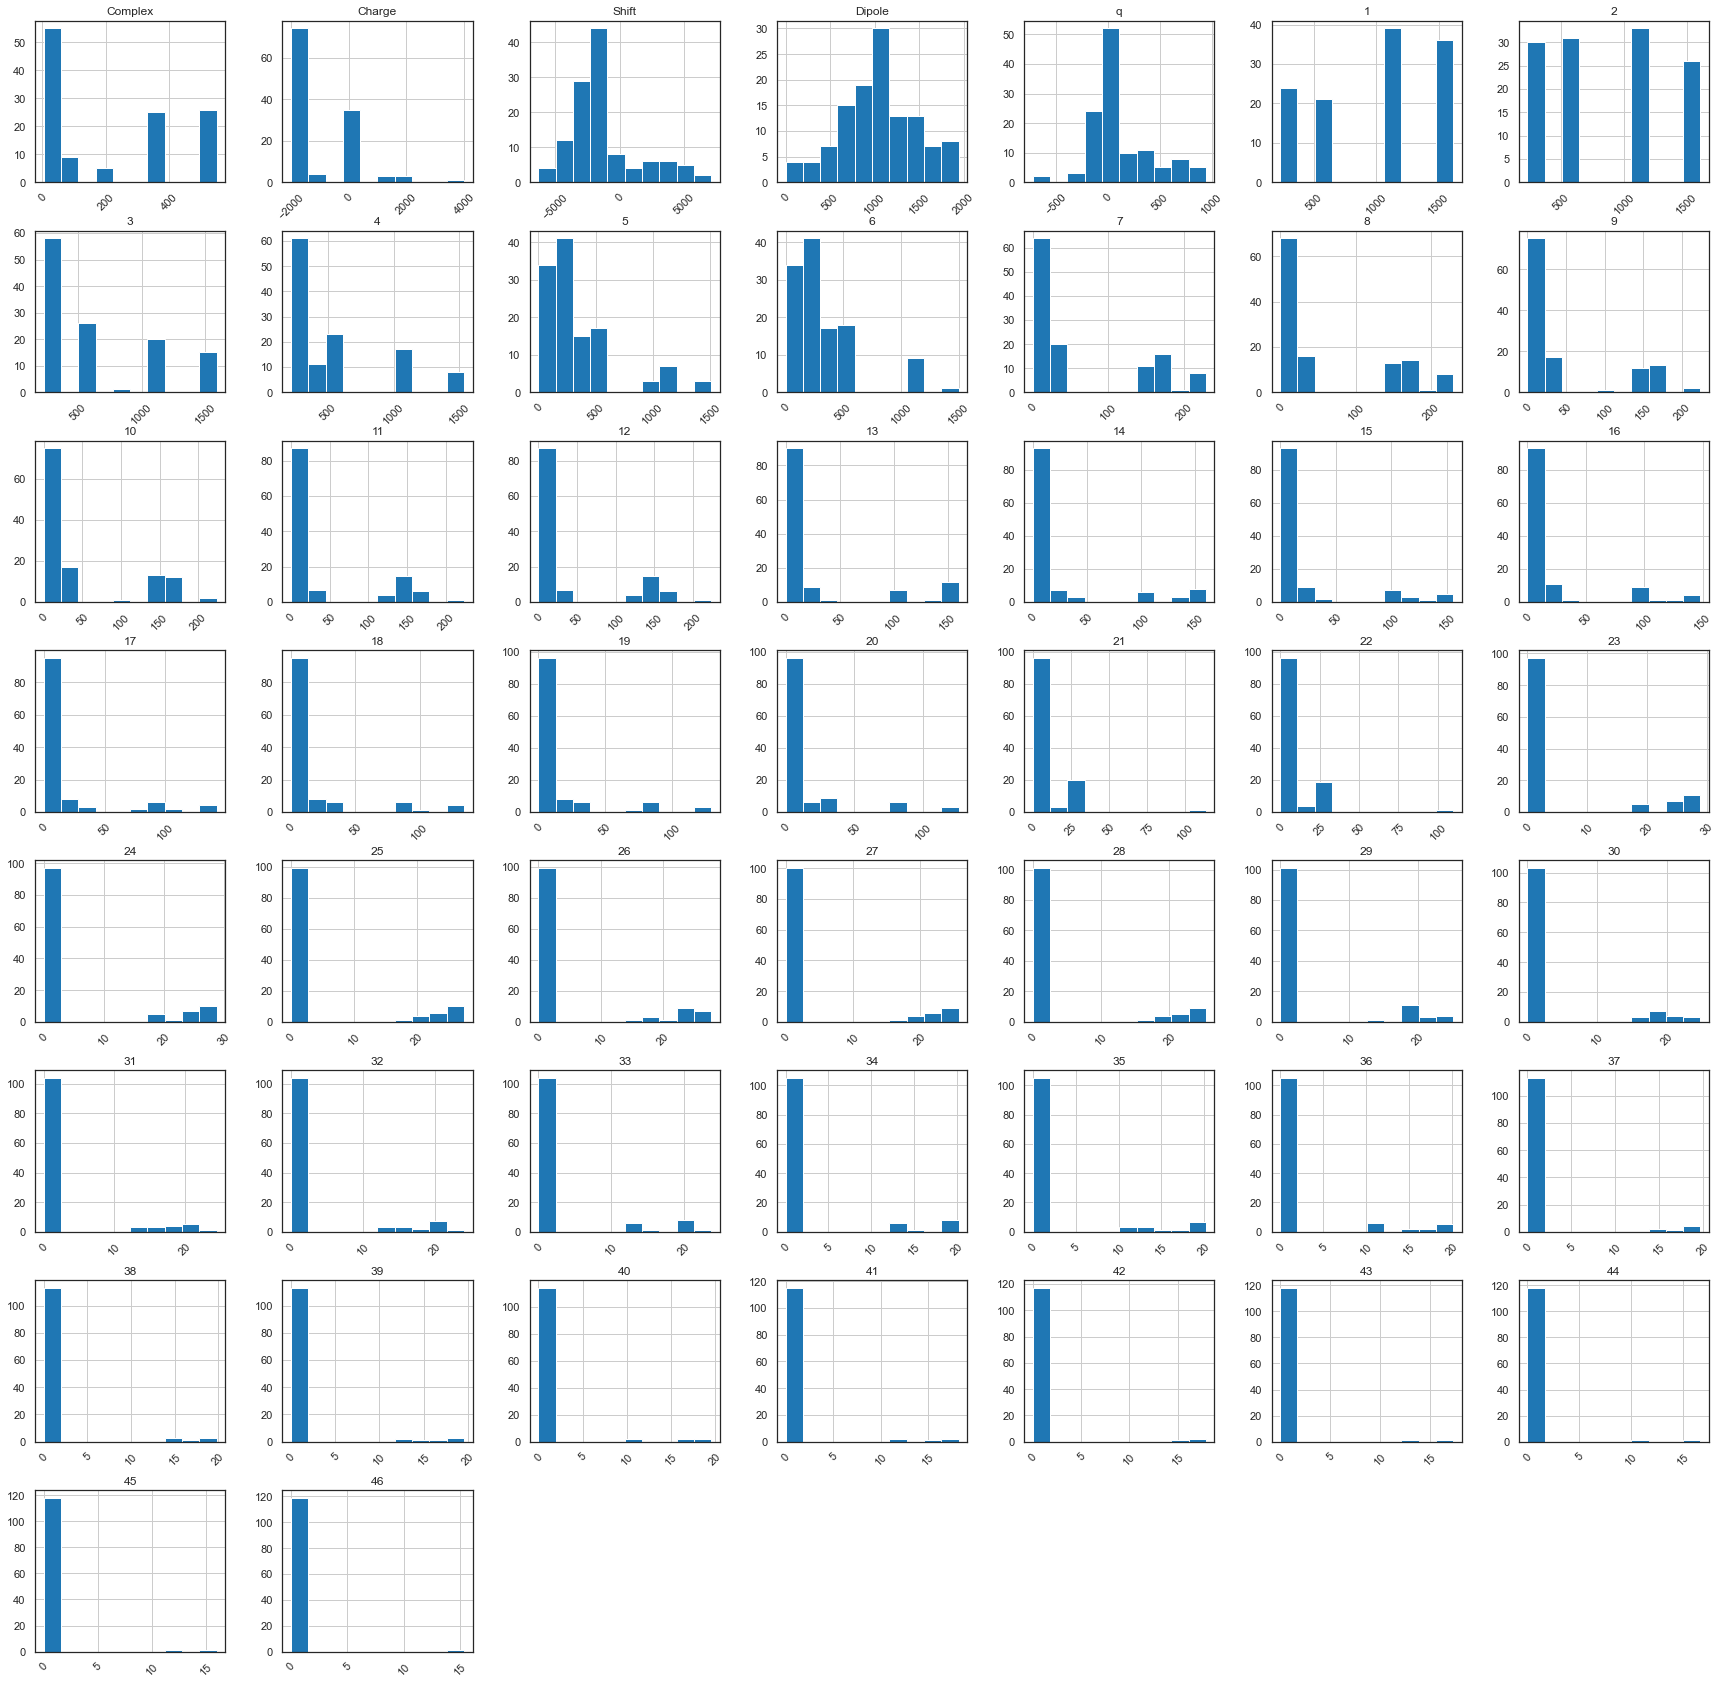

In [13]:
dg.hist(figsize=(30,30), xrot=45)
plt.show()

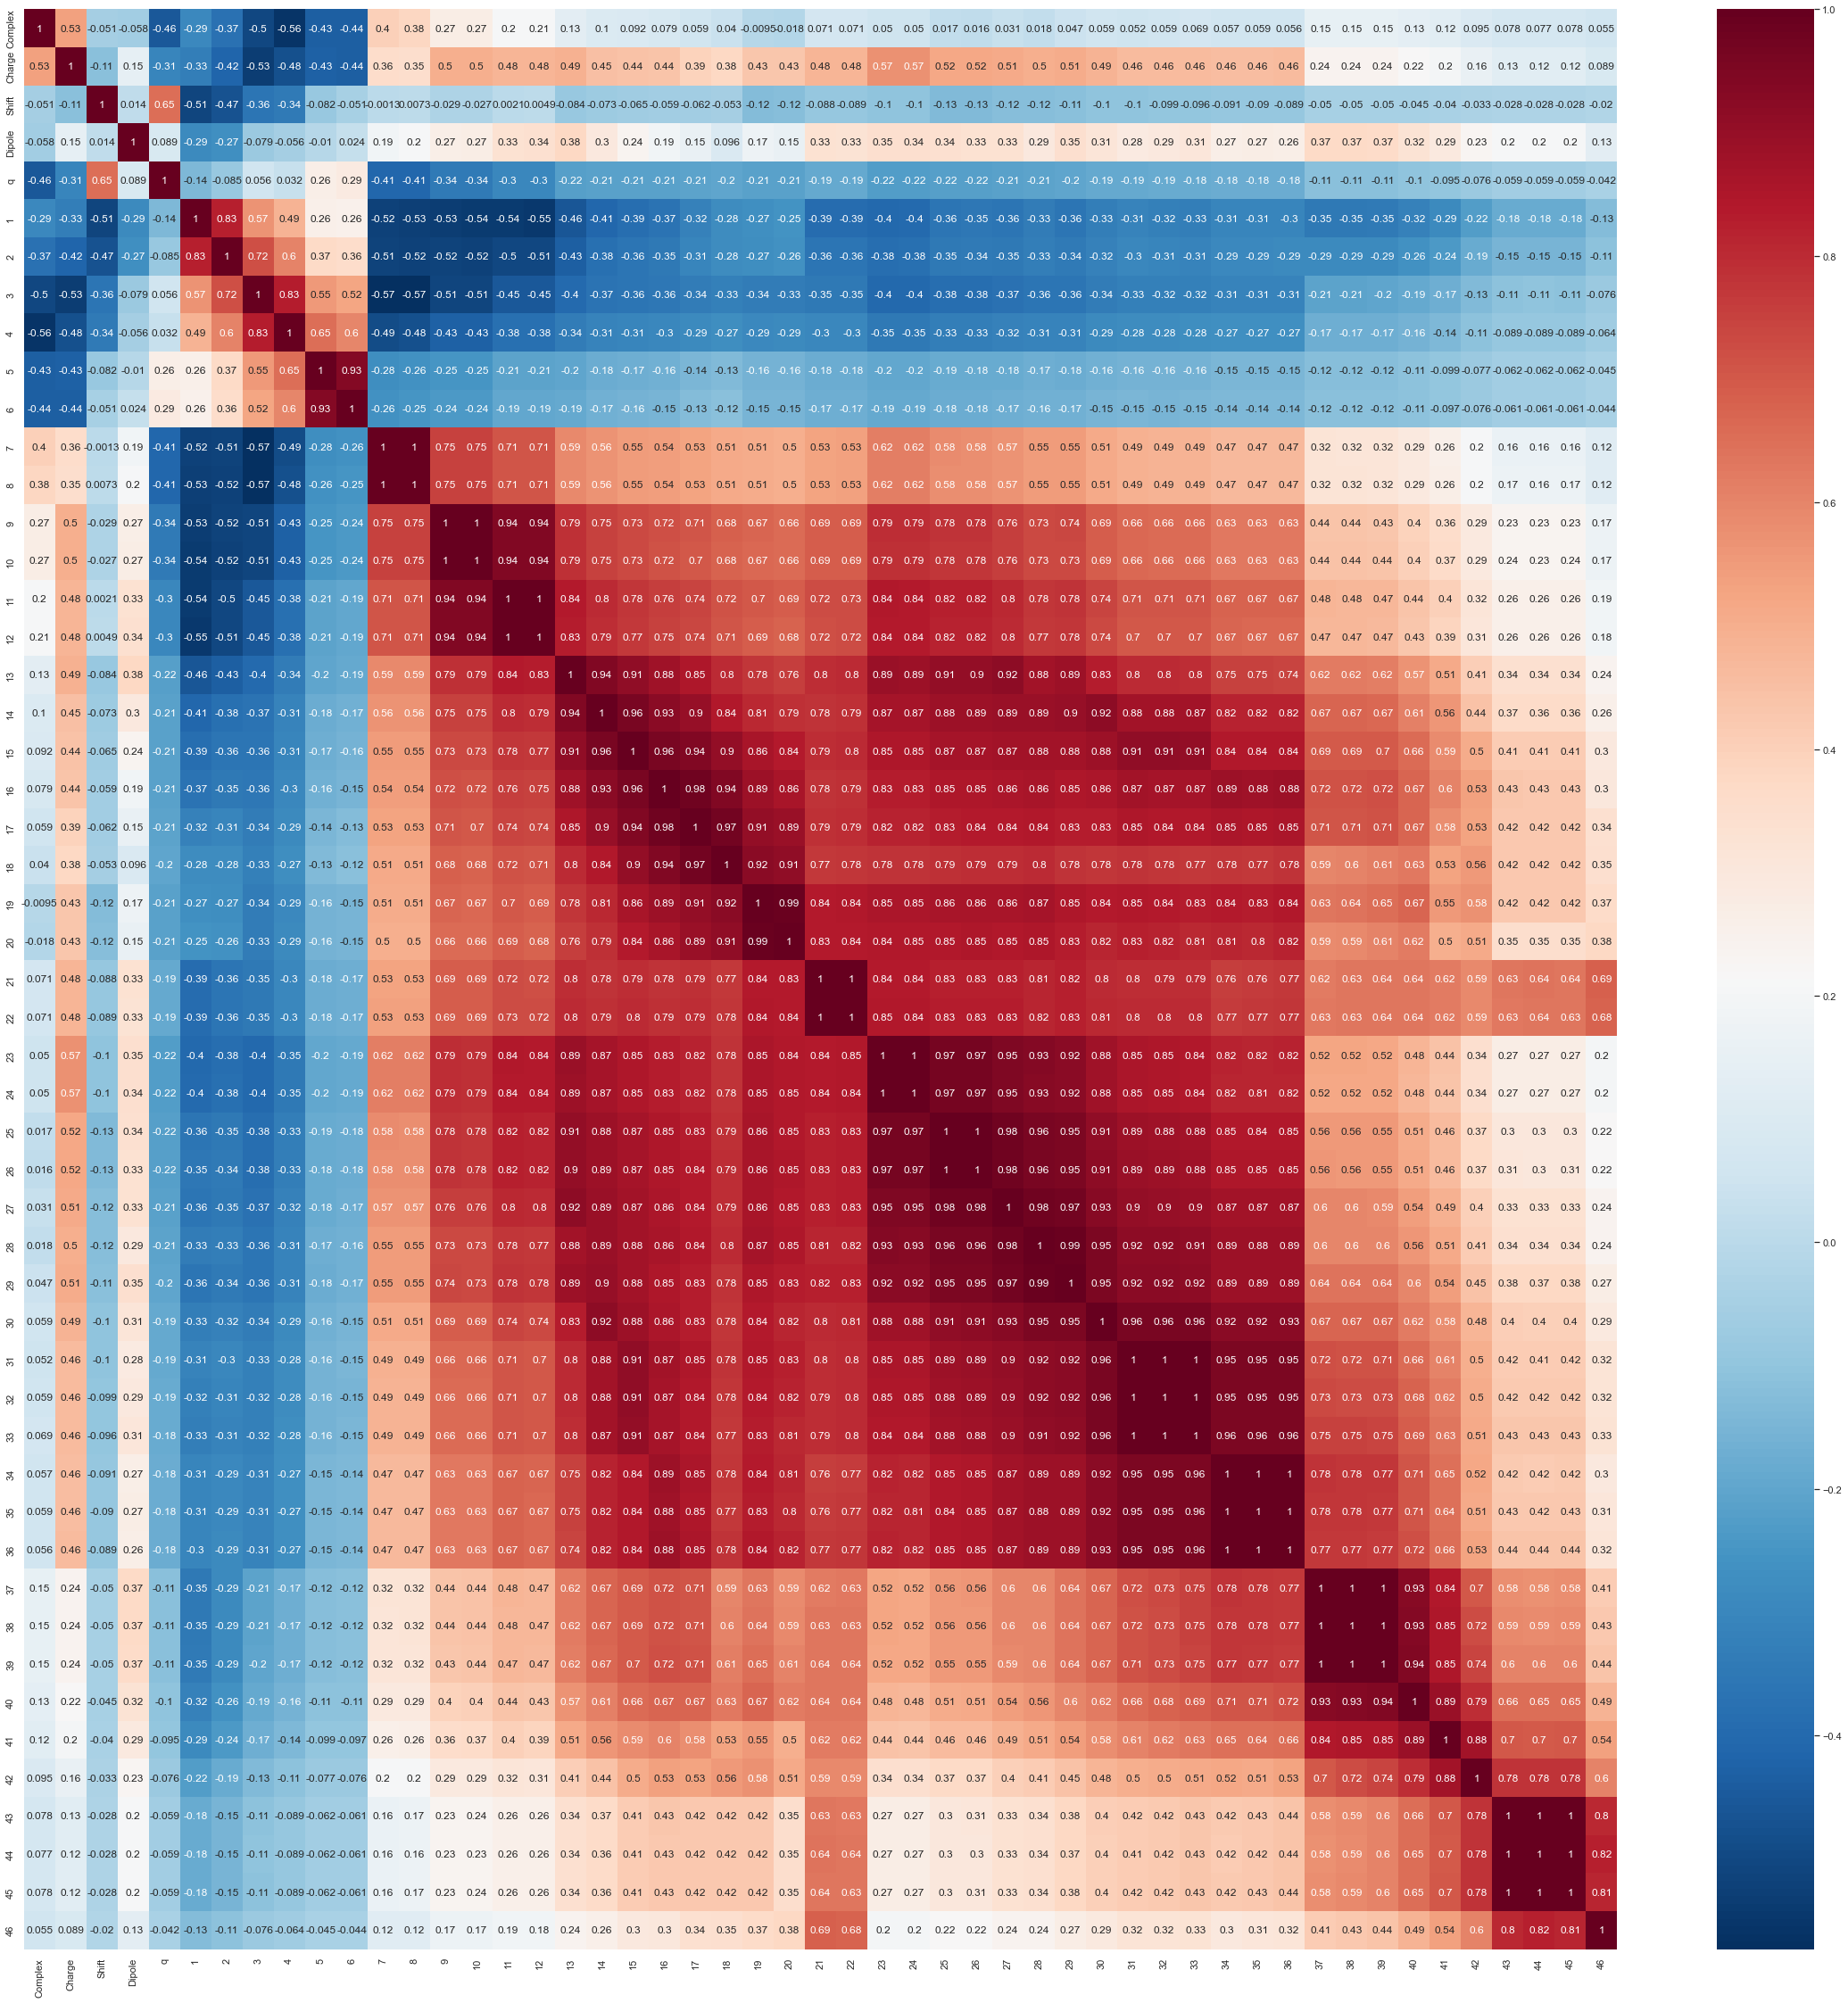

In [14]:
corrs = dg.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
# plt.savefig('corr_matrix.png', dpi=200)
plt.show()

In [17]:
#Detection of too correlated features. Threshold = 0.95
upper = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool))
strong_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
# dg = dg.drop(strong_corr, axis=1)
strong_corr

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['8',
 '10',
 '12',
 '15',
 '16',
 '17',
 '18',
 '20',
 '22',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '38',
 '39',
 '44',
 '45']

In [16]:
dg.isnull().sum()

Complex         0
Charge          0
Shift           0
Dipole          0
q               0
Brutto          0
Charge_class    0
Geometry        0
Ligand          0
Smiles          0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0
10              0
11              0
12              0
13              0
14              0
15              0
16              0
17              0
18              0
19              0
20              0
21              0
22              0
23              0
24              0
25              0
26              0
27              0
28              0
29              0
30              0
31              0
32              0
33              0
34              0
35              0
36              0
37              0
38              0
39              0
40              0
41              0
42              0
43              0
44              0
45              0
46        

## Visualization

In [18]:
dg.columns

Index(['Complex', 'Charge', 'Shift', 'Dipole', 'q', 'Brutto', 'Charge_class',
       'Geometry', 'Ligand', 'Smiles', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46'],
      dtype='object')

### PCA

In [20]:
features = ['Dipole', 'q', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46']

df = dg
scaler = StandardScaler()

df[features] = scaler.fit_transform(df[features])
pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

n = 3
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n)]
initial_feature_names = features
print('Initial', initial_feature_names)
most_important_names = [initial_feature_names[most_important[i]] for i in range(n)]
print('PCA', most_important_names)

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(n),
    color=df['Geometry']
)
fig.update_traces(diagonal_visible=False)
fig.show()

Initial ['Dipole', 'q', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46']
PCA ['29', '44', '4']


In [21]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Geometry'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [22]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Ligand'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [23]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Charge_class'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

### t-SNE

In [24]:
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(df[features], )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.Ligand
)
fig.update_traces(marker_size=8)
fig.show()

/opt/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [25]:
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(df[features], )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.Geometry
)
fig.update_traces(marker_size=8)
fig.show()

/opt/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [26]:
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(df[features], )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.Charge_class
)
fig.update_traces(marker_size=8)
fig.show()

/opt/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

